In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import torchvision.models as tvmodels

In [3]:
from IPython.core.debugger import set_trace

In [4]:
path = 'data/'
!ls {path}

models	sample_submission.csv  test.csv  train.csv


### Load Training + Validation Data

In [5]:
train_path = f'{path}train.csv'
train_raw = pd.read_csv(train_path)
train_raw.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def insert_id_column(df, s, e, label='id'):
    df.insert(0, label, np.arange(s, e))

### Process Training and validation dataframe

In [7]:
tr = train_raw
n_rows = tr.shape[0]
insert_id_column(tr, 0, n_rows)

In [8]:
tr.tail()

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,41995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,41996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,41997,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,41998,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,41999,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Process Test Dataframe

In [9]:
test_path = f'{path}test.csv'
test_raw = pd.read_csv(test_path)
test_raw.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
n_tests = test_raw.shape[0]
test_df = test_raw.copy() # Dataframe with ID column
insert_id_column(test_df, 0, n_tests)
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.tail()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,27995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,27996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,27997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,27998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,27999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Create DataBunch for FastAI

In [12]:
def raw_row2image(r):
    r = np.reshape(r, (28,28))
    r = np.stack([r, r, r]) # 1 channel to 3 channel
    r = torch.from_numpy(r.astype('float32'))
    r = r / 255
    return Image(r)

In [13]:
def my_image_open(self, fn, df):
    row_pos = int(fn.split('/')[-1])
    r = df.values[row_pos, -784:]
    return raw_row2image(r)

In [14]:
class MyImageItemList(ImageItemList):
    
    def open(self, fn):
        row_pos = int(fn.split('/')[-1])
        r = self._orig_df.values[row_pos, -784:]
        return raw_row2image(r)

In [15]:
class TestIIL(ImageItemList):
    open = functools.partialmethod(my_image_open, df=test_df)

class TrainValidIIL(ImageItemList):
    open = functools.partialmethod(my_image_open, df=tr)

In [16]:
tfms = get_transforms(do_flip=False)

In [18]:
test_list = TestIIL.from_df(test_df, path)

In [19]:
test_list

TestIIL (28000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data

In [134]:
from fastai.data_block import EmptyLabelList

Needed to monkey-patch the `add_test` method in `LabelLists`

In [160]:
def my_add_test(self, items:Iterator, label:Any=None, test_cls=None):
    "Add test set containing `items` with an arbitrary `label`."
    # if no label passed, use label of first training item

    if label is None: labels = EmptyLabelList([0] * len(items))
    else: labels = self.valid.y.new([label] * len(items)).process()
    
    target_class = test_cls if test_cls is not None else target_class = self.valid.x.new    
    
    if isinstance(items, ItemList): items = target_class(items.items, xtra=items.xtra).process()
    else: items = self.valid.x.new(items).process()          
    
    self.test = self.valid.new(items, labels)
    return self

In [161]:
LabelLists.add_test = my_add_test

In [162]:
data = (TrainValidIIL.from_df(tr, path)
        .random_split_by_pct(0.1)
        .label_from_df()
        .add_test(test_list, test_cls=TestIIL)
        .transform(tfms, size=28)
        .databunch())  

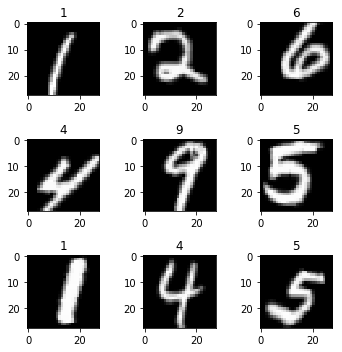

In [163]:
data.show_batch(3, figsize=(5,5), hide_axis=False)

In [164]:
data.test_ds

LabelList
y: EmptyLabelList (28000 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: TestIIL (28000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .

In [166]:
data.test_ds.x[0]

In [151]:
print(data.valid_ds.x)

TrainValidIIL (4200 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data


In [15]:
learn1 = create_cnn(data, models.resnet34, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


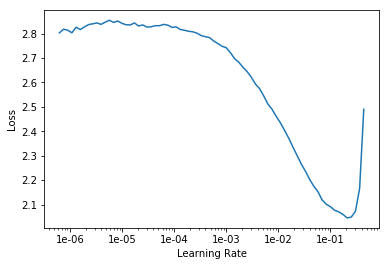

In [16]:
learn1.lr_find()
learn1.recorder.plot()

In [18]:
learn1.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.205233,0.066389,0.979762


In [24]:
learn1.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.089673,0.043519,0.984762
2,0.089774,0.246158,0.986190
3,0.084151,0.032004,0.990000


In [25]:
learn1.save('mnisttest_res34')

## Improvements

In [83]:
logs, y = learn1.TTA()

In [84]:
accuracy(logs, y)

tensor(0.9893)

### Unfreeze

In [167]:
ilearn = create_cnn(data, models.resnet34, metrics=accuracy)

In [104]:
ilearn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


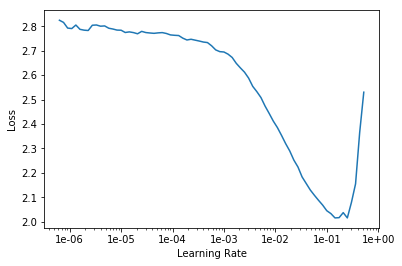

In [105]:
ilearn.recorder.plot()

In [106]:
ilearn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,0.200559,0.069864,0.978571


In [107]:
ilearn.unfreeze()

In [112]:
lr = 1e-1

In [113]:
ilearn.fit_one_cycle(3, [lr/100, lr/10, lr])

epoch,train_loss,valid_loss,accuracy
1,1.463322,95.660873,0.985952
2,0.337843,0.143837,0.994762
3,0.176079,0.057251,0.996667


In [110]:
ilearn.fit_one_cycle(3, [lr/100, lr/10, lr])

epoch,train_loss,valid_loss,accuracy
1,1.298559,1.235412,0.953809
2,0.388838,0.144299,0.983810
3,0.073603,0.037008,0.992143


In [111]:
ilearn.fit_one_cycle(7, [lr/100, lr/10, lr])

epoch,train_loss,valid_loss,accuracy
1,0.277793,0.171285,0.984048
2,1.887245,696.359924,0.886429
3,0.918771,1.240865,0.966190
4,0.652537,0.500813,0.982619
5,0.216265,0.085028,0.990952
6,0.083381,0.038973,0.992381
7,0.045798,0.027912,0.993095


In [207]:
ilearn.save('mnisttest_res34_9930') # Actually its 99.4

In [113]:
ilearn.fit_one_cycle(10, [lr/100, lr/10, lr])

epoch,train_loss,valid_loss,accuracy
1,0.089714,0.064157,0.990238
2,0.727969,0.277954,0.985714
3,1.106133,193.116577,0.979048
4,1.068770,0.627509,0.981667
5,0.836160,0.284906,0.991190
6,0.416458,0.279356,0.989762
7,0.304517,44.487030,0.988095
8,0.097314,15.898400,0.993333
9,0.032113,4.460660,0.992143
10,0.026307,9.959720,0.991667


In [208]:
accuracy(*ilearn.TTA())

tensor(0.9960)

## Test Data Prediction

### Check Test Data is loaded properly

In [168]:
learn1 = ilearn

In [ ]:
learn1.load('mnisttest_res34_9930')
print('loaded')

In [170]:
first_test_image = raw_row2image(test_df.values[0,1:])
first_test_image

In [171]:
learn1.data.test_ds.x[0]

In [172]:
learn1.predict(first_test_image) # Predict the first test image

(Category 2,
 tensor(2),
 tensor([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.3773e-40, 2.8026e-45, 0.0000e+00]))

### Use TTA (99.4% Test Accuracy)

In [190]:
from fastai.basic_data import DatasetType
log_preds, y = learn1.TTA(ds_type=DatasetType.Test)

In [192]:
log_preds[0]

tensor([7.5084e-02, 3.5965e-14, 7.0000e-01, 1.6242e-08, 2.0379e-04, 7.5001e-02,
        1.4949e-01, 5.5661e-09, 2.1435e-04, 1.3668e-10])

In [201]:
test_preds = np.argmax(log_preds, axis=1)
test_preds.shape, test_preds.min(), test_preds.max()

(torch.Size([28000]), tensor(0), tensor(9))

### Without TTA

In [197]:
test_preds, _ = learn1.get_preds(ds_type=DatasetType.Test)
test_preds.shape

In [199]:
test_preds = np.argmax(test_preds, axis=1)
test_preds.shape, test_preds.min(), test_preds.max()

### Test Prediction with Baseline And Submit

In [202]:
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, 1 + test_raw.shape[0]),
    'Label': test_preds
})

submission_df.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


Load Baseline

In [102]:
prev = pd.read_csv('mnist_subm.csv')

In [103]:
prev.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [203]:
matches = submission_df['Label'] != prev['Label']

In [204]:
np.sum(matches) / matches.shape[0] * 100

1.075

### For Loop Style (about 5 minutes)

Baseline was created this way.

In [28]:
test_images = [raw_row2image(row) for row in test_raw.values]

In [60]:
%time tmp = [learn1.predict(i) for i in test_images]

CPU times: user 4min 48s, sys: 25.5 s, total: 5min 13s
Wall time: 5min 13s


In [64]:
test_preds = np.array( [i[1] for i in tmp])

In [66]:
test_preds.min(), test_preds.max()

(0, 9)

In [77]:
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, 1 + test_raw.shape[0]),
    'Label': test_preds
})

In [78]:
submission_df.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


## Submit To Kaggle

In [205]:
submission_df.to_csv('mnist_subm_new.csv',index=False)

In [206]:
# !kaggle competitions submit digit-recognizer -f mnist_subm_new.csv -m "Second submission"

100%|████████████████████████████████████████| 208k/208k [00:00<00:00, 1.03MB/s]
Successfully submitted to Digit Recognizer

# Other Experiments

## Conv2D - Not working!

In [14]:
# mymodel = nn.Sequential(
#     nn.Conv2d(1,  16, kernel_size=3, stride=2, padding=1), nn.ReLU(),
#     nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1), nn.ReLU(),
#     nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1), nn.ReLU(),
#     nn.AdaptiveAvgPool2d(1),
#     Lambda(lambda x: x.view(x.size(0),-1))
# )

In [15]:
# learn = create_cnn(data, lambda x: mymodel, metrics=accuracy)
# learn.lr_find()
# learn.recorder.plot()
# learn.fit(10)

## Shallow Networks

In [30]:
class MyImageItemList(ImageItemList):
    def open(self, fn):
        row_pos = int(fn.split('/')[-1])
        r = tr[row_pos:row_pos+1]
        r = tr.values[row_pos, 2:]
        r = r.astype('float32')
        r = r / 255
        return r

In [10]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 100, bias=True)
        
        self.lin1a = nn.Linear(100, 50, bias=True)
        self.bn1a = nn.BatchNorm1d(50)
        
        self.lin1b = nn.Linear(50, 20, bias=True)
        self.bn1b = nn.BatchNorm1d(20)
        
        self.lin2 = nn.Linear(20, 10, bias=True)

    def forward(self, xb):
        x = F.relu(self.lin1(xb))
        
        x = F.relu(
            self.bn1a(self.lin1a(x))
        )
        
        x = F.relu(
            self.bn1b(self.lin1b(x))
        )
        return self.lin2(x)

In [15]:
learn2 = Learner(data, Mnist_NN(), loss_func=nn.CrossEntropyLoss(), metrics=accuracy, wd=1e-15)

In [16]:
learn2.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.211293,0.212228,0.940000
2,0.119645,0.111221,0.965714
3,0.063050,0.081223,0.975714


In [29]:
learn2.fit(7)

epoch,train_loss,valid_loss,accuracy
1,0.069184,0.094922,0.971905
2,0.067473,0.098517,0.972143
3,0.050728,0.101476,0.971429
4,0.042419,0.093784,0.973810
5,0.035824,0.089326,0.977381
6,0.037116,0.106607,0.973810
7,0.029225,0.087549,0.975476
